<a href="https://colab.research.google.com/github/mikolajsemeniuk/Feature-detection-on-text-using-dimensionality-reduction/blob/main/Feature_detection_on_text_using_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature detection using dimensionality reduction

## Import libraries

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

sns.set_theme()
sns.set(rc={'figure.figsize': (16, 10)})

from numpy import ndarray
from pandas.core.frame import DataFrame
from pandas.core.series import Series

from typing import List, Dict, Tuple, Callable

## Load Dataset

In [2]:
path: str = \
    '/content/drive/MyDrive/Data/datasets/spam_messages/SPAM text message 20170820 - Data.csv'

dataset: DataFrame = pd.read_csv(path)

dataset.shape

(5572, 2)

## Explore dataset

In [3]:
dataset.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


### Check types

In [4]:
dataset.dtypes

Category    object
Message     object
dtype: object

### Check nulles

In [5]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

### Check ratio

In [6]:
dataset.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Check unique values

In [7]:
dataset.Category.unique()

array(['ham', 'spam'], dtype=object)

### Check if `Message` contains no empty strings

In [8]:
0 == len(np.where(dataset['Message'] == '')[0])

True

## Data preparation

### Convert all columns to `string`

In [9]:
dataset = dataset.convert_dtypes() # dataset.Category = dataset.Category.astype('string')

dataset.dtypes

Category    string
Message     string
dtype: object

### Encode `Category` to numbers

In [10]:
from sklearn.preprocessing import LabelEncoder

y: ndarray = \
    LabelEncoder().fit_transform(dataset.Category)

y.shape, y.shape, y[:10]

((5572,), (5572,), array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1]))

### Encode `Message` to tfdif vectorizer
Version 1.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

X_counts: ndarray = \
    CountVectorizer().fit_transform(dataset.Message).toarray()

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()

X: ndarray = transformer.fit_transform(X_counts).toarray()

type(X), X.shape, X[X > 0]

(numpy.ndarray,
 (5572, 8709),
 array([0.32645117, 0.24417483, 0.31163293, ..., 0.55766163, 0.14864182,
        0.42358279]))

### Encode `Message` to tfdif vectorizer
Version 2.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

X: ndarray = \
    TfidfVectorizer().fit_transform(dataset.Message).toarray()

type(X), X.shape, X[X > 0]

(numpy.ndarray,
 (5572, 8709),
 array([0.32645117, 0.24417483, 0.31163293, ..., 0.55766163, 0.14864182,
        0.42358279]))

## Concatenate Prepared data into one `DataFrame`

In [14]:
dataset_prepared: DataFrame = \
    pd.concat([pd.DataFrame(y), pd.DataFrame(X)], axis=1)
    
dataset_prepared.head()

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,8669,8670,8671,8672,8673,8674,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split data into `train` and `test`

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900, 8709), (1672, 8709), (3900,), (1672,))

## Prepare model
Version 1.

In [16]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Evaluate metrics

### Confusion Matrix

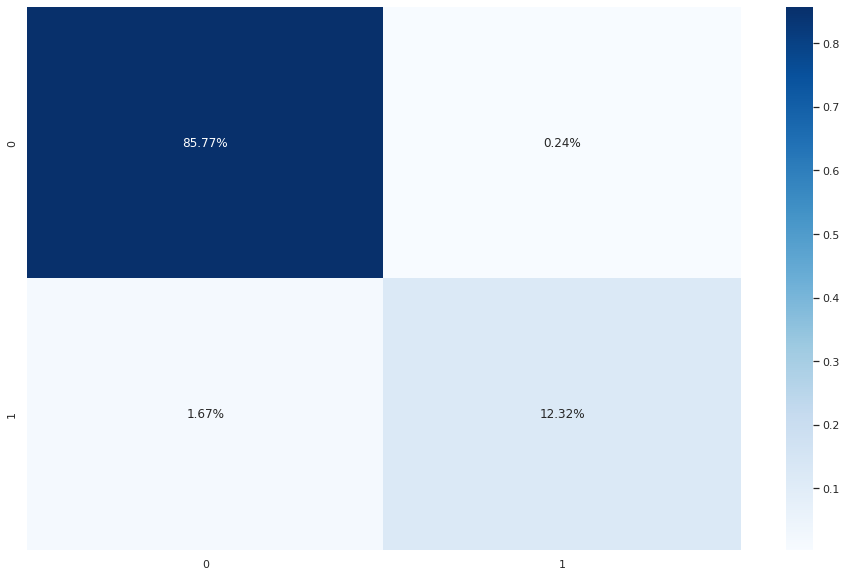

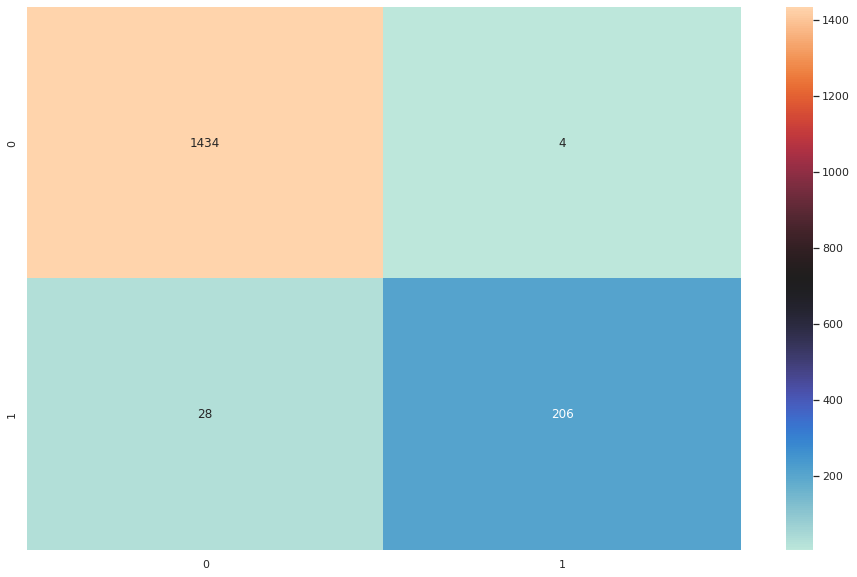

In [30]:
from sklearn.metrics import confusion_matrix

y_pred: ndarray = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix / np.sum(matrix), annot = True, fmt = '.2%', cmap = 'Blues')
plt.show()

sns.heatmap(matrix, annot = True, fmt = 'g', cmap = 'icefire')

### Classification Report

In [37]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1438
           1       0.98      0.88      0.93       234

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from numpy import float64

precision: ndarray
recall: ndarray

precision, recall, _ = \
  precision_recall_curve(y_test, y_pred)

average_precision: float64 = \
  average_precision_score(y_test, y_pred)

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.88')

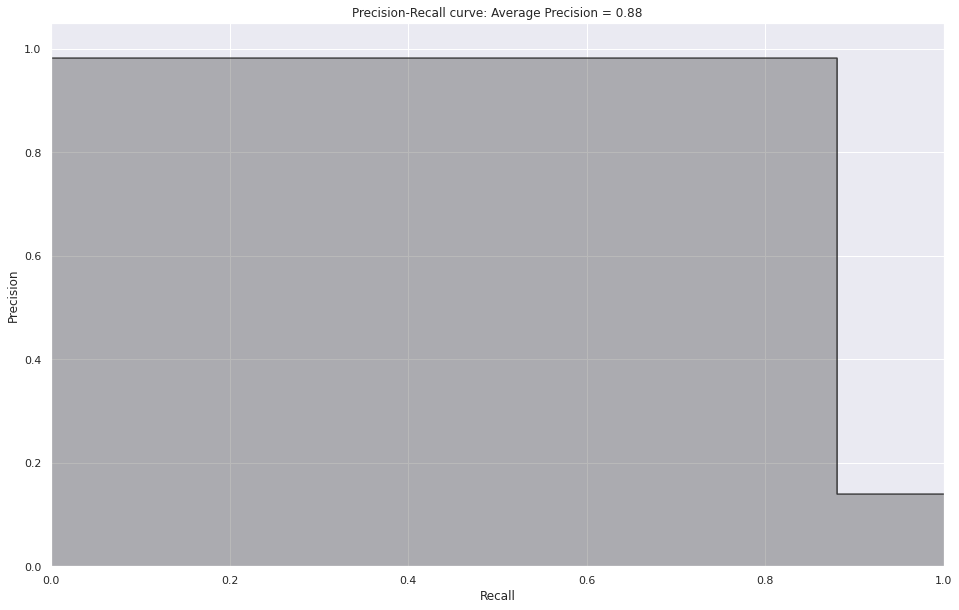

In [49]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

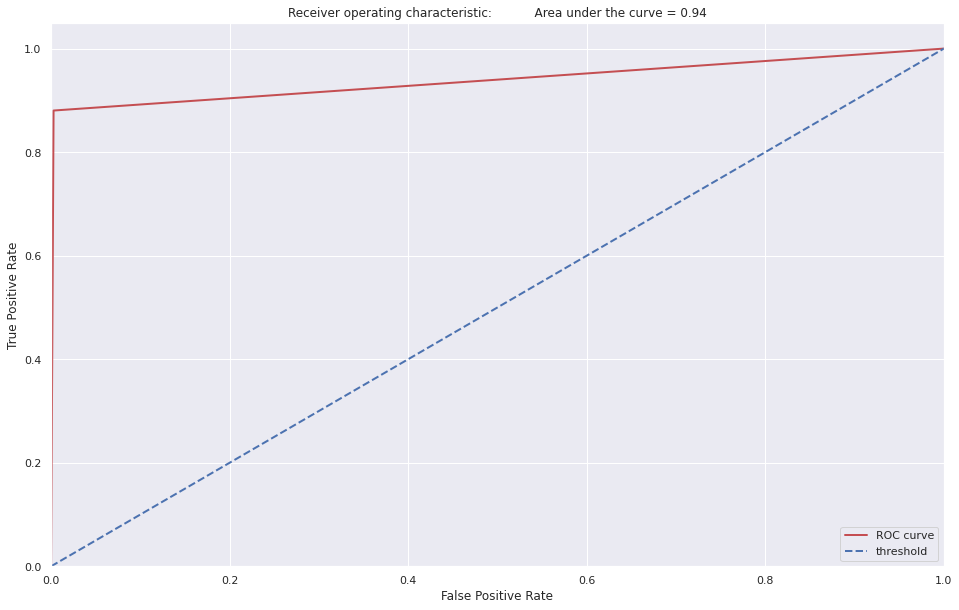

In [75]:
from sklearn.metrics import roc_curve, auc

fpr: np.ndarray
tpr: np.ndarray

fpr, tpr, _ = \
  roc_curve(y_test, y_pred)

areaUnderROC: float64 = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--', label='threshold')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

plt.show()